In [1]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point

In [17]:
#from shapely.geometry import Point

In [2]:
worldmap_path = '/Users/Vicky/Documents/Documents/Studium/IMPACT_project/team-2/Data/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.shp'

worldmap = gpd.read_file(worldmap_path)

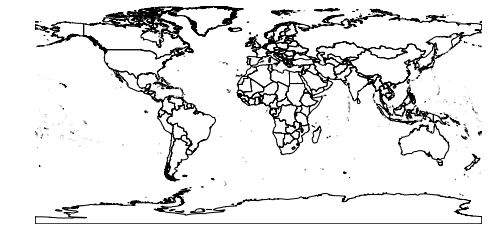

In [3]:
gplt.polyplot(worldmap, figsize=(8, 4))

In [4]:
nigeria_path = '/Users/Vicky/Downloads/NGA_adm/NGA_adm2.shp'

nigeriamap = gpd.read_file(nigeria_path)

Text(0.5, 1.0, 'Nigeria Administrative Divisions')

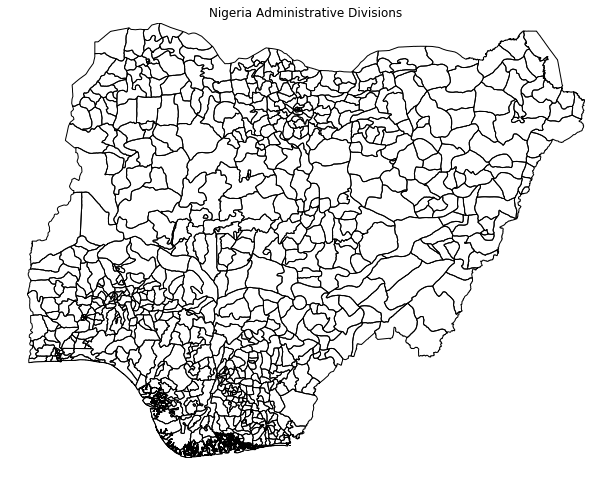

In [5]:
gplt.polyplot(nigeriamap, figsize=(10,8))
plt.title('Nigeria Administrative Divisions')

In [54]:
import pandas as pd
camps = pd.ExcelFile('/Users/Vicky/Documents/Documents/Studium/IMPACT_project/Data/reach_nga_msna_initial_sample.xlsx')

In [55]:
camp = camps.parse(0)

In [56]:
camp.head()

MSNA_FULL_SAMPLE Unnamed: 1 Unnamed: 2  Unnamed: 3              Unnamed: 4  \
0            State        LGA       ward  Ward_alt1_  Sample Settlement_Camp   
1          Adamawa      Demsa    Borrong     Borrong              BORRONG A    
2          Adamawa      Demsa       Dong        Dong                   DONG    
3          Adamawa      Girei    Girei 1     Girei I              SABON GARI   
4          Adamawa      Girei    Girei 2    Girei II              MAI TURARE   

  Unnamed: 5 Unnamed: 6        Unnamed: 7        Unnamed: 8 Unnamed: 9  \
0     Survey       TYPE        Settleme_1            DOMAIN         HH   
1         11        IDP   host community   Southern Adamawa        138   
2         11        IDP   host community   Southern Adamawa        630   
3          5        IDP    host community  Northern Adamawa        326   
4          5        IDP    host community  Northern Adamawa         94   

  Unnamed: 10 Unnamed: 11  
0         lon         lat  
1      12.181     9.53608  
2     11.9336     9.40498  
3     12.5073     9.33938  
4     12.5522     9.37211

In [59]:
camp.columns = camp.iloc[0]
camp = camp.reindex(camp.index.drop(0))

In [60]:
camp.head()

0    State    LGA     ward Ward_alt1_ Sample Settlement_Camp Survey TYPE  \
1  Adamawa  Demsa  Borrong    Borrong             BORRONG A      11  IDP   
2  Adamawa  Demsa     Dong       Dong                  DONG      11  IDP   
3  Adamawa  Girei  Girei 1    Girei I             SABON GARI      5  IDP   
4  Adamawa  Girei  Girei 2   Girei II             MAI TURARE      5  IDP   
5  Adamawa  Girei  Girei 2   Girei II             SABON FEGI      5  IDP   

0        Settleme_1            DOMAIN   HH      lon      lat  
1   host community   Southern Adamawa  138   12.181  9.53608  
2   host community   Southern Adamawa  630  11.9336  9.40498  
3    host community  Northern Adamawa  326  12.5073  9.33938  
4    host community  Northern Adamawa   94  12.5522  9.37211  
5    host community  Northern Adamawa   58  12.5593  9.37582

In [61]:
latlon = camp[['lon','lat']]
latlon.head()

0      lon      lat
1   12.181  9.53608
2  11.9336  9.40498
3  12.5073  9.33938
4  12.5522  9.37211
5  12.5593  9.37582

### Eliminate the NaN rows... we cannot map them.

In [62]:
camp_no_nan = camp.dropna(subset=['lon','lat'])

In [63]:
camp_no_nan.head()

0    State    LGA     ward Ward_alt1_ Sample Settlement_Camp Survey TYPE  \
1  Adamawa  Demsa  Borrong    Borrong             BORRONG A      11  IDP   
2  Adamawa  Demsa     Dong       Dong                  DONG      11  IDP   
3  Adamawa  Girei  Girei 1    Girei I             SABON GARI      5  IDP   
4  Adamawa  Girei  Girei 2   Girei II             MAI TURARE      5  IDP   
5  Adamawa  Girei  Girei 2   Girei II             SABON FEGI      5  IDP   

0        Settleme_1            DOMAIN   HH      lon      lat  
1   host community   Southern Adamawa  138   12.181  9.53608  
2   host community   Southern Adamawa  630  11.9336  9.40498  
3    host community  Northern Adamawa  326  12.5073  9.33938  
4    host community  Northern Adamawa   94  12.5522  9.37211  
5    host community  Northern Adamawa   58  12.5593  9.37582

### Convert the dataframe to a geopandas dataframe

In [66]:
camp_no_nan['Coordinates'] = list(zip(camp_no_nan['lon'], camp_no_nan['lat']))

/anaconda3/envs/impact_proj/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
camp_no_nan['Coordinates'] = camp_no_nan['Coordinates'].apply(Point)

/anaconda3/envs/impact_proj/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
camp_gdf = gpd.GeoDataFrame(camp_no_nan, geometry='Coordinates')
camp_gdf.head()

0    State    LGA     ward Ward_alt1_ Sample Settlement_Camp Survey TYPE  \
1  Adamawa  Demsa  Borrong    Borrong             BORRONG A      11  IDP   
2  Adamawa  Demsa     Dong       Dong                  DONG      11  IDP   
3  Adamawa  Girei  Girei 1    Girei I             SABON GARI      5  IDP   
4  Adamawa  Girei  Girei 2   Girei II             MAI TURARE      5  IDP   
5  Adamawa  Girei  Girei 2   Girei II             SABON FEGI      5  IDP   

0        Settleme_1            DOMAIN   HH      lon      lat  \
1   host community   Southern Adamawa  138   12.181  9.53608   
2   host community   Southern Adamawa  630  11.9336  9.40498   
3    host community  Northern Adamawa  326  12.5073  9.33938   
4    host community  Northern Adamawa   94  12.5522  9.37211   
5    host community  Northern Adamawa   58  12.5593  9.37582   

0                         Coordinates  
1            POINT (12.18101 9.53608)  
2            POINT (11.93362 9.40498)  
3            POINT (12.50727 9.33938)  
4  POINT (12.55222 9.372109999999999)  
5  POINT (12.55931 9.375819999999999)

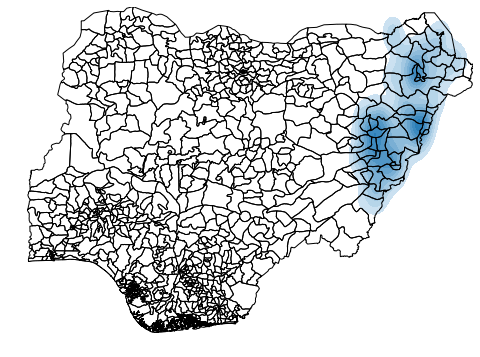

In [72]:
ax = gplt.kdeplot(camp_gdf,shade=True, shade_lowest=False)
gplt.polyplot(nigeriamap, ax=ax)

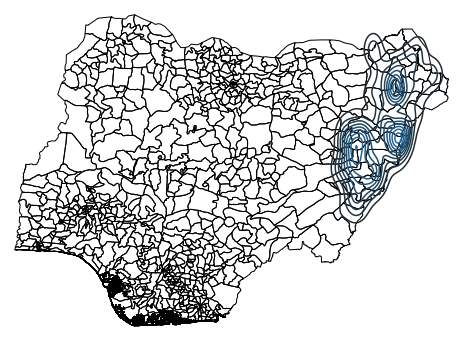

In [75]:
ax = gplt.kdeplot(camp_gdf, projection=gplt.crs.AlbersEqualArea(),
                  n_levels=10)
gplt.polyplot(nigeriamap, projection=gplt.crs.AlbersEqualArea(), ax=ax)

In [4]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

<div class="bk-root">
        <a href="https://bokeh.pydata.org" target="_blank" class="bk-logo bk-logo-small bk-logo-notebook"></a>
        <span id="1102">Loading BokehJS ...</span>
    </div>

<div class="bk-root">
        <a href="https://bokeh.pydata.org" target="_blank" class="bk-logo bk-logo-small bk-logo-notebook"></a>
        <span id="1102">Loading BokehJS ...</span>
    </div>

<div class="bk-root" id="236ec5ad-104b-4bce-9eb5-78c3f6e437a1" data-root-id="1103"></div>

<div class="bk-root" id="236ec5ad-104b-4bce-9eb5-78c3f6e437a1" data-root-id="1103"></div>